# Overview
Dataset from: https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset

### Introduction
There are a few methods that I intend to employ within this data. Given that there are only 8 features, there is not much dimensionality within the data. Therefore, more complex models such as neural networks may not be needed.

### Methods Selection
As such, the following will more than likely be enough to properly synthesize appropriate results:
- Logistic Regression: Will allow more interpretable results.
- Random Forest/Decision Tree: While the Random Forest may be more accurate, I will utilize both approaches, since these both do well with problems that have a feature count similar to this problem.
- Support Vector Machine: Works well with non-linear relationships, which may be found within this data.
- Gradient Boosting (XGBoost): May combine this with techniques to see if there is a data imbalance (I.e. SMOTE & ADASYN)

## Imports

In [3]:
import os
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Initialize Data

In [4]:
# Download latest version
path = kagglehub.dataset_download("akshaydattatraykhare/diabetes-dataset")

print("Path to dataset files:", path)

100%|██████████| 8.91k/8.91k [00:00<00:00, 8.50MB/s]

Extracting files...
Path to dataset files: C:\Users\Brendito\.cache\kagglehub\datasets\akshaydattatraykhare\diabetes-dataset\versions\1


In [5]:
# Load the CSV file into a pandas DataFrame
csv_file_path = os.path.join(path, "diabetes.csv")  # Replace "diabetes.csv" with the actual file name
df = pd.read_csv(csv_file_path)

# Get the Length of the DataFrame
print("Length of df:", len(df))

Length of df: 768


## Preprocessing of Data

In [6]:
# Define the columns to check for zero values
columns_to_check = ["Glucose", "SkinThickness", "BloodPressure", "Insulin", "BMI"]

# Replace zero values in the specified columns with -1
df[columns_to_check] = df[columns_to_check].replace(0, -1)

## Data Examination

In [7]:
print(df.head())  # Display the first few rows of the DataFrame

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35       -1  33.6   
1            1       85             66             29       -1  26.6   
2            8      183             64             -1       -1  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [8]:
# Create empty DataFrame to store statistics
columns = ['Count', 'Mean', 'Std', 'Min', '5%', '25%', 'Median', '75%', '95%', 'Max']
stats_df = pd.DataFrame(index=df.columns, columns=columns)

# Calculate statistics for each column
for column in df.columns:
    # Filter out the -1 values
    filtered_data = df[df[column] != -1][column]
    
    # Places to round to
    round_to = 3
    
    # Calculate statistics
    stats_df.loc[column, 'Count'] = filtered_data.count()
    stats_df.loc[column, 'Mean'] = round(filtered_data.mean(), round_to)
    stats_df.loc[column, 'Std'] = round(filtered_data.std(), round_to)
    stats_df.loc[column, 'Min'] = round(filtered_data.min(), round_to)
    stats_df.loc[column, '5%'] = round(filtered_data.quantile(0.05), round_to)
    stats_df.loc[column, '25%'] = round(filtered_data.quantile(0.25), round_to)
    stats_df.loc[column, 'Median'] = round(filtered_data.median(), round_to)
    stats_df.loc[column, '75%'] = round(filtered_data.quantile(0.75), round_to)
    stats_df.loc[column, '95%'] = round(filtered_data.quantile(0.95), round_to)
    stats_df.loc[column, 'Max'] = round(filtered_data.max(), round_to)
print(stats_df)

# Round to 2 decimal places and save as csv
stats_df.to_csv("diabetes_stats.csv")

                         Count     Mean      Std    Min     5%    25% Median  \
Pregnancies                768    3.845     3.37      0    0.0    1.0    3.0   
Glucose                    763  121.687   30.536     44   80.0   99.0  117.0   
BloodPressure              733   72.405   12.382     24   52.0   64.0   72.0   
SkinThickness              541   29.153   10.477      7   13.0   22.0   29.0   
Insulin                    394  155.548  118.776     14  41.65  76.25  125.0   
BMI                        757   32.457    6.925   18.2   22.2   27.5   32.3   
DiabetesPedigreeFunction   768    0.472    0.331  0.078   0.14  0.244  0.372   
Age                        768   33.241    11.76     21   21.0   24.0   29.0   
Outcome                    768    0.349    0.477      0    0.0    0.0    0.0   

                            75%    95%   Max  
Pregnancies                 6.0   10.0    17  
Glucose                   141.0  181.0   199  
BloodPressure              80.0   92.0   122  
SkinThickne

### Graphs

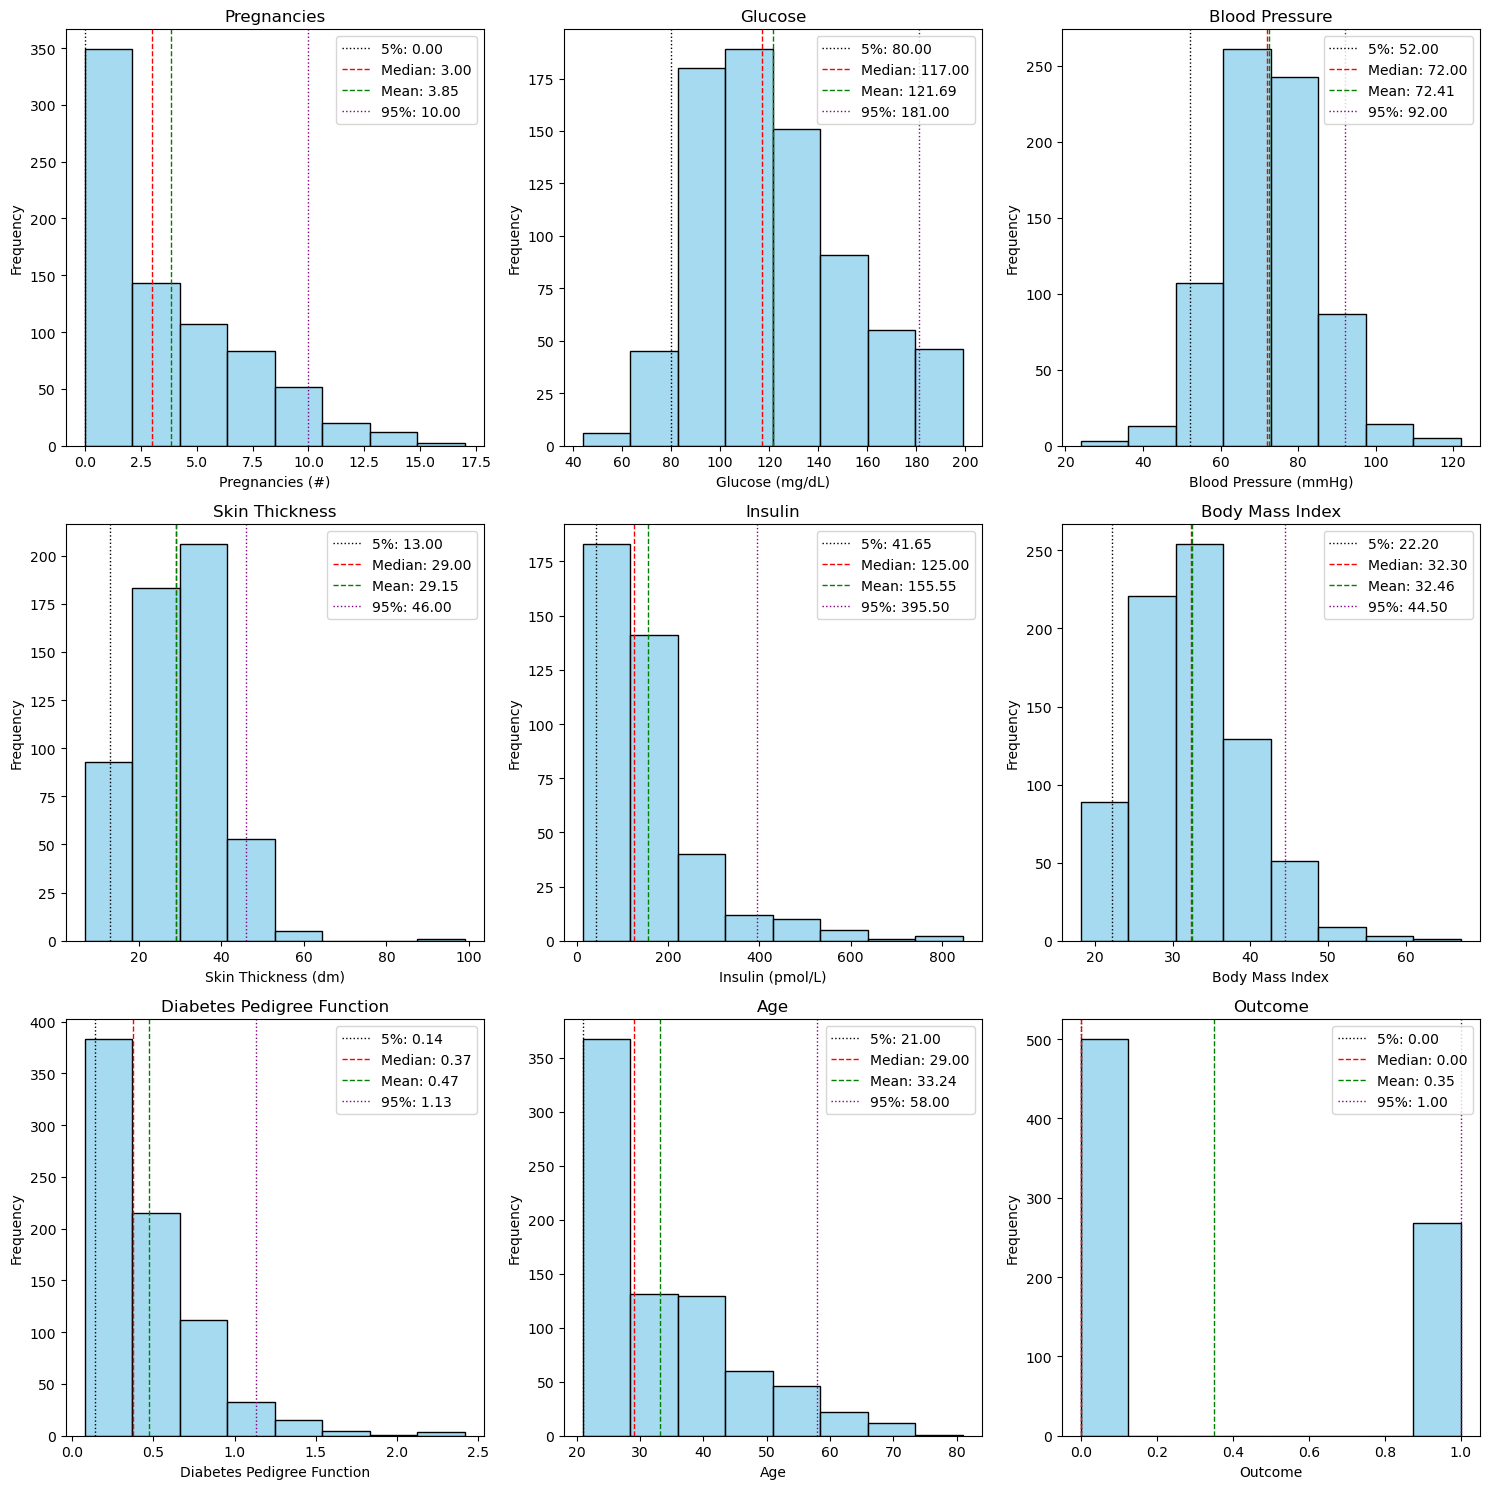

In [9]:
# Create a 3x3 grid of histograms using Seaborn
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.ravel()  # Flatten the 3x3 array of axes for easier iteration

# Dictionary of Name Changes
name_changes = {"BloodPressure": "Blood Pressure", "SkinThickness": "Skin Thickness", "DiabetesPedigreeFunction": "Diabetes Pedigree Function", "BMI": "Body Mass Index", "Age": "Age", "Glucose": "Glucose", "Insulin": "Insulin", "Pregnancies": "Pregnancies"}
x_labels = {"BloodPressure": "Blood Pressure (mmHg)", "SkinThickness": "Skin Thickness (dm)", "DiabetesPedigreeFunction": "Diabetes Pedigree Function", "BMI": "Body Mass Index", "Age": "Age", "Glucose": "Glucose (mg/dL)", "Insulin": "Insulin (pmol/L)", "Pregnancies": "Pregnancies (#)"}

# Plot each column in the DataFrame
for i, column in enumerate(df.columns):
    # Filter out values that are -1
    filtered_data = df[df[column] != -1][column]
    
    # Create histogram without KDE line
    sns.histplot(data=filtered_data, bins=8, kde=False, ax=axes[i], color='skyblue', edgecolor='black')
    
    # Add statistical markers
    median = filtered_data.median()
    q1 = filtered_data.quantile(0.05)
    q3 = filtered_data.quantile(0.95)
    mean = filtered_data.mean()
    axes[i].axvline(q1, color='black', linestyle='dotted', linewidth=1, label=f'5%: {q1:.2f}')
    axes[i].axvline(median, color='red', linestyle='dashed', linewidth=1, label=f'Median: {median:.2f}')
    axes[i].axvline(mean, color='green', linestyle='dashed', linewidth=1, label=f'Mean: {mean:.2f}')
    axes[i].axvline(q3, color='purple', linestyle='dotted', linewidth=1, label=f'95%: {q3:.2f}')
    
    # Set titles and labels
    title = f"{name_changes.get(column, column)}"
    axes[i].set_title(title)
    axes[i].set_xlabel(x_labels.get(column, column))
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

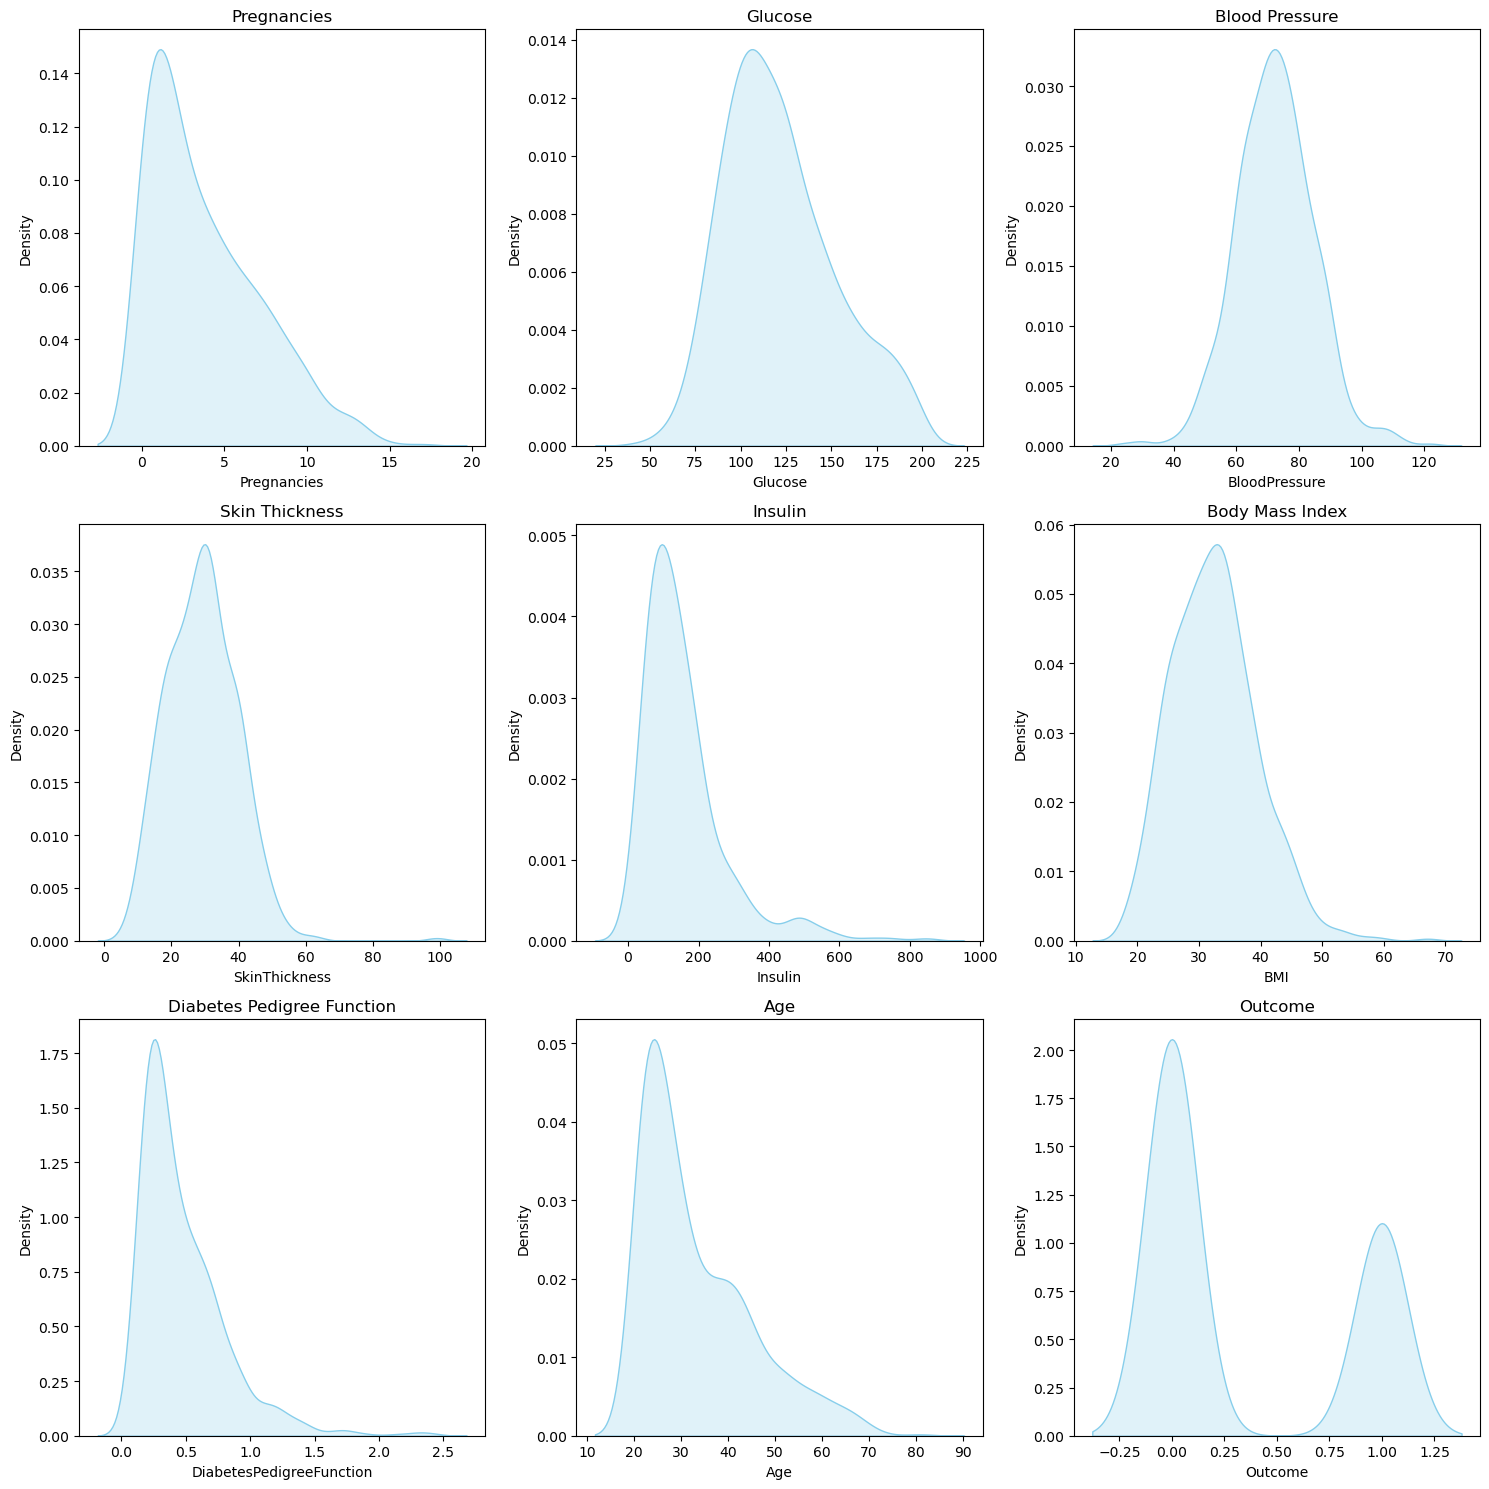

In [10]:
# Create a 3x3 grid for KDE plots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.ravel()  # Flatten the 3x3 array of axes for easier iteration

# Plot KDE for each column
for i, column in enumerate(df.columns):
    # Filter out values that are -1
    filtered_data = df[df[column] != -1][column]
    sns.kdeplot(data=filtered_data, ax=axes[i], fill=True, color='skyblue', bw_adjust=1, label='KDE')
    axes[i].set_title(f"{name_changes.get(column, column)}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')
    # axes[i].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## Logistic Regression